In [1]:
import pandas as pd
import numpy as np

#-------------------------------------------------------------------------------
# Read data
#-------------------------------------------------------------------------------

columns = [
    # Outcome variable
    'price',
    # AC-type 1
    'Apartment', 'Condominium', 'Loft',
    # AC-type 2
    'Bed_&_breakfast', 'Dorm',
    # AC-type 3
    'Bungalow', 'House', 'Townhouse', 
    'Villa', 'Cabin', 'Chalet',
    # AC-types to drop
    'Boat', 'Castle', 'Other', 'Camper/RV',
    'Cave', 'Earth House', 'Hut', 'Igloo',
    'Island', 'Lighthouse', 'Parking Space', 'Plane',
    'Tent', 'Tipi', 'Train', 'Treehouse', 'Yurt', 
    # Cancellation policy
    'moderate', 'strict',
    # Policies to drop
    'super_strict_30', 'super_strict_60', 
    # Host Attributes
    'host_is_superhost', 'host_listings_count',
    'host_has_profile_pic', 'host_identity_verified',
    # Site & Property Attributes
    'Distance_km', 'entire_home_apt',
    'private_room', 'shared_room',
    'accommodates', 'bathrooms', 'bedrooms',
    # Amenities & Services
    'Real_bed', 'Wireless_Internet', 'Breakfast',
    'Free_Parking', 'instant_bookable',
    # Rental Rules
    'Smoking_Allowed',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    # Online Reviews: Number & Ratings
    'Reviews_per_years',
    'review_scores_rating',
    # For Visualization
    'latitude', 'longitude'
] 

df = pd.read_csv('/Users/ar8787/Dropbox/data_eco/Udesa/mater_thesis/data/Paris_data.csv', delimiter = ';',  
                 decimal = ",", usecols = columns)

In [2]:
#has to be encoded as utf-8
#df.info() (df.shape, df.columns, df.head(), df.dtypes etc. )
df.isna().sum().loc[df.isna().sum() != 0]
df = df.dropna()

#-------------------------------------------------------------------------------
# Format data
#-------------------------------------------------------------------------------

df['price']             = [x.replace('.','')  for x in df['price']]
df['price']             = [x.replace(',','.') for x in df['price']]
df['price']             = [x.replace('$','')  for x in df['price']]
df['Reviews_per_years'] = [x.replace(',','.') for x in df['Reviews_per_years']]
df = df[df['Reviews_per_years'] != '#NUM!']
df = df[df['Reviews_per_years'] != '#VALUE!']
df = df[df['Reviews_per_years'] != '#DIV/0!']

df['price']             = df['price'].astype(float)
df['Reviews_per_years'] = df['Reviews_per_years'].astype(float)


In [3]:

#-------------------------------------------------------------------------------
# Exclude some variables for reference categories
#-------------------------------------------------------------------------------

columns_to_drop = [
    #Accommodations to be dropped:
    'Boat', 'Castle', 'Other', 'Camper/RV',
    'Cave', 'Earth House', 'Hut', 'Igloo',
    'Island', 'Lighthouse', 'Parking Space', 'Plane',
    'Tent', 'Tipi', 'Train', 'Treehouse', 'Yurt',
]

for column in columns_to_drop:
    df = df[df[column] == 0]
df = df.drop(columns_to_drop, axis = 1)


#-------------------------------------------------------------------------------
# Cancellation policy
#-------------------------------------------------------------------------------

#df['super_strict_30'].value_counts() #5 times
#df['super_strict_60'].value_counts() #6 times

df['cancellation_policy'] = df['moderate'] + df['strict']

#-------------------------------------------------------------------------------
# Accomodation Type
#-------------------------------------------------------------------------------

df['accommodation_type_1'] = (
    df['Apartment'] 
    + df['Condominium'] 
    + df['Loft']
)

df['accommodation_type_2'] = (
    df['Bed_&_breakfast'] 
    + df['Dorm']
)

df['accommodation_type_3'] = (
    df['Bungalow'] 
    + df['House'] 
    + df['Townhouse'] 
    + df['Villa']
    + df['Cabin']
    + df['Chalet']
)

df = df.drop([
    'moderate', 'strict', 'Apartment', 
    'Condominium', 'Loft', 'Bed_&_breakfast', 
    'Dorm', 'Bungalow', 'House', 'Townhouse', 
    'Villa', 'Cabin', 'Chalet'
], axis = 1)


In [4]:
#-------------------------------------------------------------------------------
# Exclusion criterion
#-------------------------------------------------------------------------------

df = df[df['Reviews_per_years'] != 0]

In [6]:
#-------------------------------------------------------------------------------
# Dataframe setup
#-------------------------------------------------------------------------------

df['pricelog'] = np.log(df['price'])

df2 = pd.DataFrame(data = df, columns = [
    'pricelog',
    'host_is_superhost',
    'host_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'Distance_km',
    'accommodation_type_1',
    'accommodation_type_2',
    'entire_home_apt',
    'private_room',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'Real_bed',
    'Wireless_Internet',
    'Breakfast',
    'Free_Parking',
    'instant_bookable',
    'cancellation_policy',
    'Smoking_Allowed',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    'Reviews_per_years',
    'review_scores_rating',
])

In [17]:
df2.to_csv('../data/clean_data_analysis.csv', index = False )

In [28]:
infodf = df2.nunique(dropna=False).reset_index() 
infodf.columns = ['name', 'nuq']
infodf.query( 'nuq<3').name.tolist()

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodation_type_1',
 'accommodation_type_2',
 'entire_home_apt',
 'private_room',
 'Real_bed',
 'Wireless_Internet',
 'Breakfast',
 'Free_Parking',
 'instant_bookable',
 'cancellation_policy',
 'Smoking_Allowed',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [7]:
X = pd.DataFrame(data = df2, columns = [
       'host_is_superhost',
       'host_listings_count',
       'host_has_profile_pic',
       'host_identity_verified',
       'Distance_km',
       'accommodation_type_1',
       'accommodation_type_2',
       'entire_home_apt',
       'private_room',
       'accommodates',
       'bathrooms',
       'bedrooms',
       'Real_bed',
       'Wireless_Internet',
       'Breakfast',
       'Free_Parking',
       'instant_bookable',
       'cancellation_policy',
       'Smoking_Allowed',
       'require_guest_profile_picture',
       'require_guest_phone_verification',
       'Reviews_per_years',
       'review_scores_rating'
       ])
X_binary = X.loc[:, X.nunique() == 2]
X_cont   = X.loc[:, X.nunique() != 2]


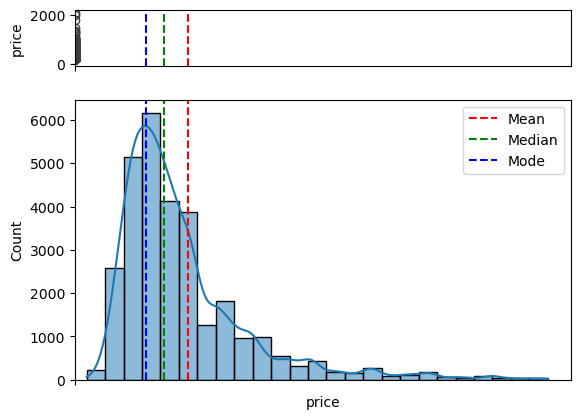

In [8]:
#-------------------------------------------------------------------------------
# Data visualization
#-------------------------------------------------------------------------------


import matplotlib.pyplot as plt
import seaborn as sns


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price'].mean()
median=df['price'].median()
mode=df['price'].mode().values[0]

sns.boxplot(df['price'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='--')
ax_box.axvline(mode, color='b', linestyle='--')

sns.histplot(df.loc[df['price'] <= df['price'].quantile(0.99), 'price'], ax=ax_hist, kde=True, bins = 25)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='--', label="Median")
ax_hist.axvline(mode, color='b', linestyle='--', label="Mode")
x_lim = (0, 417.4)
ax_box.set(xlim = x_lim)

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [10]:
#f.savefig("C:/Users/Ken/Desktop/Masterarbeit/Figures/price_plot") 


cont = np.array([
['Price', 95.27, 117.18, 0.23],
["Host listings count", 4.64, 5.66, 0.22],
["Distance", 4.52, 6.28, 0.39],
["Accommodates", 3.07, 3.25, 0.06],
["Bathrooms", 1.09, 1.20, 0.10],
["Bedrooms", 1.07, 1.30, 0.21],
["Reviews per year", 10.45, 9.65, -0.08],
["Review scores for overall rating", 90.99, 92.08, 0.01]
])


binary = np.array([
["Superhost", 0.07, 0.09, 0.02],
["Host's profile picture", 1, 0.99, -0.01],
["Host identity verified", 0.57, 0.64, 0.07],
["Accommodation type 1", 0.98, 0.77, -0.21],
["Accommodation type 2", 0.01, 0.02, 0.01],
["Accommodation type 3", 0.01, 0.2, 0.19],
["Entire home/apartment", 0.86, 0.65, -0.21],
["Private room", 0.13, 0.32, 0.19],
["Shared room", 0.01, 0.01, 0.00],
["Real bed", 0.87, 0.95, 0.08],
["Wireless Internet", 0.95, 0.94, -0.01],
["Breakfast", 0.08, 0.09, 0.01],
["Free parking", 0.03, 0.26, 0.23],
["Instant bookable", 0.17, 0.16, -0.01],
["Cancellation policy", 0.73, 0.73, 0.00],
["Smoking Allowed", 0.23, 0.12, -0.11],
["Required guest's profile picture", 0.03, 0.04, 0.01],
["Required guest's phone verification", 0.05, 0.06, 0.01]
])


df_cont = pd.DataFrame(data=cont[:, 1:3][:,::-1], 
index=cont[:,0],
columns=(['Overall','Paris']), dtype = float)
df_cont['Change'] = np.around((df_cont['Paris'] - df_cont['Overall']) / df_cont['Paris']*100)

df_bin = pd.DataFrame(data=binary[:, 1:3][:,::-1], 
index=binary[:,0],
columns=(['Overall','Paris']), dtype = float)
df_bin['Change'] = np.around((df_bin['Paris'] - df_bin['Overall'])*100)

df_cont = df_cont.T
df_bin = df_bin.T

cont_text = []

for row in df_cont.values.T:
    cont_text.append(['%.2f' % row[0], '%.2f' % row[1], '%.0f%%' % row[2]])

bin_text = []

for row in df_bin.values.T:
    bin_text.append(['%.2f' % row[0], '%.2f' % row[1], '%.0f%%' % row[2]])

/var/folders/r4/lwrzx5hs7d3cxk4p5zsy7zqh0000gp/T/ipykernel_41607/3318393693.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


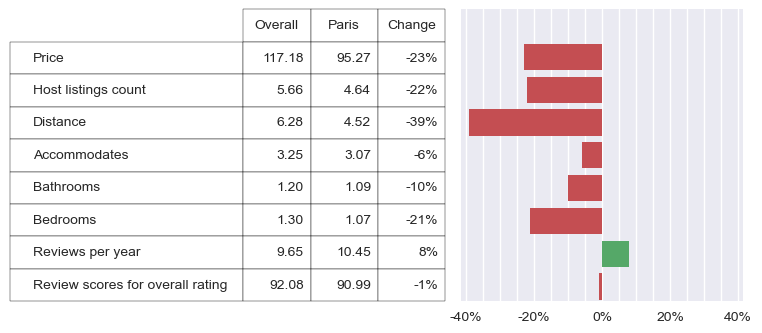

In [11]:
#-------------------------------------------------------------------------------
# Continuous Variable Change
#-------------------------------------------------------------------------------

plt.style.use('seaborn')

fig, ax = plt.subplots(1, 2,  gridspec_kw = {'width_ratios': [1, 1]}, figsize = (8, 8*9/19), sharey = True)
x1 = np.append(df_cont.iloc[2, ::-1].to_numpy(),0)
ax[1].barh(y     = np.arange(len(x1)), 
           width = x1, 
           align = 'center',
           color = [sns.color_palette()[1] if x >= 0 else sns.color_palette()[2] for x in x1]
           )

ax[1].set(
    yticks = [], 
    yticklabels = [], 
    xlim = [-max(np.abs(ax[1].get_xlim())), max(np.abs(ax[1].get_xlim()))],
    xticks = np.arange(-40, 41, 5),
    xticklabels = ['-40%', '', '', '', '-20%', '', '', '', '0%', '', '', '', '20%', '', '', '', '40%'],
    ylim = [-0.45, 8.45]
    )

the_table = ax[0].table(cellText=cont_text,
                      rowLabels=df_cont.columns,
                      colLabels=['Overall', 'Paris', 'Change'],
                      loc='center',
                      bbox = [0,0,1,1]
                      )
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)

#axes placing
box = ax[0].get_position()
box2 = ax[1].get_position()
box.x0 = box.x0 + (box2.x0-box.x1) -0.02 +0.17
box.x1 = box.x1 + (box2.x0-box.x1) -0.02 +0.07
box2.x0 = box2.x0 + 0.07
box2.x1 = box2.x1 + 0.07
ax[0].set_position(box)
ax[1].set_position(box2)
plt.show()

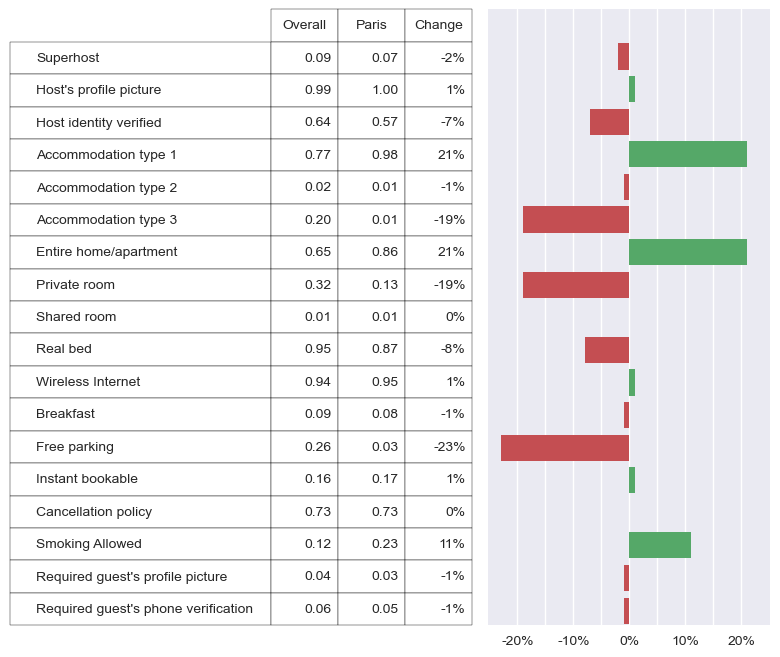

In [12]:
#-------------------------------------------------------------------------------
# Binary Variable Change
#-------------------------------------------------------------------------------

fig, ax = plt.subplots(1, 2,  gridspec_kw = {'width_ratios': [1, 1]}, figsize = (8,8))
x1 = np.append(df_bin.iloc[2, ::-1].to_numpy(),0)
ax[1].barh(y     = np.arange(len(x1)), 
           width = x1, 
           align = 'center',
           color = [sns.color_palette()[1] if x >= 0 else sns.color_palette()[2] for x in x1]
           )
ax[1].set(
    yticks = [], 
    yticklabels = [], 
    xlim = [-max(np.abs(ax[1].get_xlim())), max(np.abs(ax[1].get_xlim()))],    
    xticks = np.arange(-20, 21, 5),
    xticklabels = ['-20%', '', '-10%', '', '0%', '', '10%', '', '20%'],
    ylim = [-0.45, 18.45]
    )

the_table = ax[0].table(cellText=bin_text,
                      rowLabels=df_bin.columns,
                      colLabels=['Overall', 'Paris', 'Change'],
                      loc='center',
                      bbox = [0,0,1,1]
                      )

ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)

#axes placing
box = ax[0].get_position()
box2 = ax[1].get_position()
box.x0 = box.x0 + (box2.x0-box.x1) -0.02 +0.17
box.x1 = box.x1 + (box2.x0-box.x1) -0.02 +0.07
box2.x0 = box2.x0 + 0.07
box2.x1 = box2.x1 + 0.07
ax[0].set_position(box)
ax[1].set_position(box2)
plt.show()

In [16]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster

# Load your data
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Load arrondissements (Paris districts)
districts_path = "/Users/ar8787/Dropbox/data_eco/Udesa/mater_thesis/data/arrondissements.geojson"
arr_df = gpd.read_file(districts_path)

# Ensure same CRS
arr_df = arr_df.to_crs(gdf.crs)

# Spatial join: assign each point to a district
joined = gpd.sjoin(gdf, arr_df, how="left", predicate="within")

# Now you have district info in joined['id'] or another column
df['arond'] = joined['id']  # or 'name', depending on geojson attribute

# Prepare data for folium
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()

# Initialize map centered on Paris
m = folium.Map(
    zoom_start=12,
    location=[48.864716, 2.349014],
    tiles='https://tiles.stadiamaps.com/tiles/alidade_smooth/{z}/{x}/{y}{r}.png',
    attr='&copy; <a href="https://stadiamaps.com/">Stadia Maps</a>, &copy; <a href="https://openmaptiles.org/">OpenMapTiles</a> &copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors'
)

# Add choropleth layer
folium.Choropleth(
    geo_data=districts_path,
    name="choropleth",
    data=df,
    columns=['arond', 'price'],
    key_on="feature.id",  # adjust depending on geojson structure
    fill_color="YlGn",
    fill_opacity=0.1,
    line_opacity=0.5,
    reset=True,
).add_to(m)

# Add markers
marker_cluster = MarkerCluster().add_to(m)
for location in locationlist:
    folium.Marker(location).add_to(marker_cluster)

m


Skipping field geom_x_y: unsupported OGR type: 3
